DataMonetize EDA by DataStalker. skype bam271074


In [10]:
# подгружаем необходимые библиотеки
import numpy as np
import pandas as pd
import pyarrow.parquet as pq


In [11]:
#connect to google drive where dataset is
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [12]:
!ls /content/gdrive/'My Drive'/dataset_DM_start

campaigns.csv  client_profile.csv  pokupki.csv	products.csv  purchases.parquet


Let s make dataframes

In [ ]:
parquet_file = pq.ParquetFile('../content/gdrive/My Drive/dataset_DM_start/purchases.parquet')
print(parquet_file.metadata)



  created_by: parquet-cpp version 1.5.1-SNAPSHOT
  num_columns: 14
  num_rows: 57249006
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 4194


In [ ]:
table = pq.read_table('../content/gdrive/My Drive/dataset_DM_start/purchases.parquet',\
                      columns=['transaction_id','transaction_datetime'])

In [13]:
purchases_df=pd.read_csv('../content/gdrive/My Drive/dataset_DM_start/pokupki.csv')
purchases_df.head()


,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


In [15]:
purchases_df.columns

Index(['client_id', 'transaction_id', 'transaction_datetime',
       'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'purchase_sum',
       'store_id', 'product_id', 'product_quantity', 'trn_sum_from_iss',
       'trn_sum_from_red'],
      dtype='object')

In [17]:
clients_df=pd.read_csv('../content/gdrive/My Drive/dataset_DM_start/client_profile.csv')
clients_df.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,0012fbc750ef4ea6df3033a871293631,2018-07-06 19:36:04,2018-07-29 18:52:30,52,F
1,002e7fd44c15546b05c430fcf099af68,2017-07-14 16:27:35,2017-09-01 18:59:59,60,M
2,00508cdd6ac2c10851c9d27cd101f2ef,2017-10-10 12:22:44,2018-03-15 12:06:35,82,M
3,008fb49e3aeae9ee74ca2f233520976e,2017-11-26 11:21:29,2018-05-31 13:07:59,40,U
4,0095340accfbedb931291477bd1f5dcb,2018-02-21 19:08:56,2018-10-14 15:48:53,21,U


In [18]:
clients_df.client_id.nunique() #number of clients

500000

In [20]:
products_df=pd.read_csv('../content/gdrive/My Drive/dataset_DM_start/products.csv')

products_df.head()

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,1fb580439559efba981fca3aeaa51603,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.30,0,0
1,16ecd66f937aa31fa37f15f87817eedb,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.70,0,0
2,15f35e4ae5bcb0d2dd86ead4087200da,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.36,0,0
3,537c9c7ff2bb439d60cc0a402bb364db,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,4da2dc345f4844de9f3d264689b14a11,a9eb455ec71c0a2694c5958f6f93c01c,0.60,0,0
4,4a6589e97b2a8a9a71929f5ef1d47851,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,c56cfe6e56132a266666af1365ecddc9,7a917b3ae0f69994e7afda12d1dd87e0,0.80,0,0


In [21]:
products_df.product_id.nunique() #number of products

43038

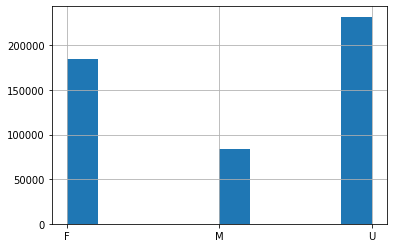

In [22]:
clients_df.gender.clip().hist()